In [1]:
import pandas as pd
import numpy as np
import jdc
from sklearn.model_selection import train_test_split
from Data_Preprocess import Data_Preprocess
from Model import QuadraticDiscriminantAnalysis as QDA
from Metrics import Metrics
import matplotlib.pyplot as plt
import seaborn as sns

# 3.1 Preprocessing

In [2]:
url = 'mushroom.txt'
column_names_csv = 'mushroom_feature_names.csv'
preprocessing = Data_Preprocess(url, column_names_csv)

# Q 3.1.1

In [3]:
preprocessing.load_dataset()

# Q 3.1.2

In [4]:
data_type = preprocessing.display_data_types()

# Q 3.1.3

Most of the features as generic text or string data.

<span style="color:red">Warning:</span>
: Unique values for stalk-root contains missing value

In [5]:
preprocessing.display_unique_values()

Unique values for class:
['p' 'e']

Unique values for cap-shape:
['x' 'b' 's' 'f' 'k' 'c']

Unique values for cap-surface:
['s' 'y' 'f' 'g']

Unique values for cap-color:
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

Unique values for bruises:
['t' 'f']

Unique values for odor:
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

Unique values for gill-attachment:
['f' 'a']

Unique values for gill-spacing:
['c' 'w']

Unique values for gill-size:
['n' 'b']

Unique values for gill-color:
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

Unique values for stalk-shape:
['e' 't']

Unique values for stalk-root:
['e' 'c' 'b' 'r' nan]

Unique values for stalk-surface-above-ring:
['s' 'f' 'k' 'y']

Unique values for stalk-surface-below-ring:
['s' 'f' 'y' 'k']

Unique values for stalk-color-above-ring:
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

Unique values for stalk-color-below-ring:
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

Unique values for veil-type:
['p']

Unique values for veil-color:
['w' 'n' 'o' 'y']

Unique 

# Q 3.1.4

Mahalanobis distance:
$$ D(x) = \sqrt{ (x - \mu)^T \Sigma^{-1} (x - \mu) } $$
The Mahalanobis distance is typically calculated on numerical data.

When our features have a data type of string (text),
we cannot directly calculate the Mahalanobis distance without
converting the data to a numerical format first.

# Q 3.1.6
What is a nan value?
A "NaN" value stands for "Not-a-Number."

It is a special floating-point value used in computing to represent

__undefined__ or __unrepresentable__ values, often arising from mathematical operations or data processing.
stalk-root has 2480 nan values others have 0.

In [6]:
nan_counts = preprocessing.drop_columns_with_high_nan(threshold=2000)

# Q 3.1.5
ordinal relationships between categories

In [7]:
preprocessing.encode_categorical_features()
encoded_data_types = preprocessing.display_data_types()

In [8]:
dataset = preprocessing.dataset

# 3.2 Creating our model: LDA

# Q 3.2.1

In [9]:
X = dataset.drop(columns=['class'])
y = dataset['class']

# Q 3.2.7

A singular matrix is a square matrix that is not invertible, meaning it does not have an inverse.

In the context of covariance matrices, singularity implies that the matrix is not __full rank__.

1. Perfect Collinearity:
    + Cause: Perfect collinearity among the features, where one feature is a perfect linear combination of others.
    - Effect: This leads to a loss of degrees of freedom, making the covariance matrix singular.

2. Redundant Features:
    + Cause: Redundant or linearly dependent features.
    - Effect: Redundant features provide redundant information, causing the covariance matrix to lose rank.

3. Insufficient Samples:
    + Cause: When the number of samples is less than the number of features.
    - Effect: Insufficient data can lead to a covariance matrix that is not full rank. With fewer samples than features, the matrix becomes singular.
    
__Regularization methods__ or __dimensionality reduction__ techniques can sometimes be employed to mitigate singularity issues.

# Q 3.2.8

what is variance?
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{n} $$

In [10]:
variances = np.var(X, axis=0)
low_variance_features = np.where(variances < 0.01)[0]
X_filtered = np.delete(X, low_variance_features, axis=1)

# Q 3.2.2

what is random state?

+ if you use the same random_state value in different runs of your program, you will get the same data split every time.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Q 3.2.3

what is the Bayes rule? It describes how to update the probability for a hypothesis (or an event) based on new evidence. 

$$ P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)} $$

How is it used in Bayesian classification? 

1. Training Phase:

       + Collect and preprocess your training data, which typically consists of labeled examples.

       + Calculate class probabilities (P(A)): For each class label, compute the prior probability of that class in the training data. This is often done by counting the number of occurrences of each class in the training set.

       + Calculate conditional probabilities (P(B∣A)): For each feature, compute the likelihood of observing that feature given a specific class. This involves calculating the conditional probability of each feature occurring within each class.

2. Testing or Prediction Phase:

       + Given a new data point (features), use Bayes' Rule to calculate the posterior probability (P(A∣B)) for each possible class.

       + To predict the class label for the new data point, select the class with the highest posterior probability. This is often referred to as the Maximum A Posteriori (MAP) decision rule.

What is each term of this rule called?

+ The __"prior probability"__ (P(A)) is the initial belief in the probability of a particular class.
+ The __"likelihood"__ (P(B∣A)) describes how likely the observed features are to occur given a specific class.
+ The __"evidence"__ (P(B)) represents the overall likelihood of observing the given features, regardless of the class.
+ The __"posterior probability"__ (P(A∣B)) is the updated belief in the probability of a particular class after observing the features.

# Q 3.2.4

What are the model parameters of LDA and QDA classifiers? These classifiers are based on different assumptions about the underlying data distribution,
and as a result, they have different sets of model parameters.

1. LDA (Linear Discriminant Analysis):
    LDA assumes that all classes have a common covariance matrix, and the decision boundaries between classes are linear.

    + Class Priors (ϕ_k): These are the prior probabilities of each class in the training data.
    + Class Means (μ_k): For each class, there is a vector of means representing the mean feature values for that class. These vectors capture the central tendency of feature values for each class.
    + Shared Covariance Matrix (Σ): This matrix characterizes the shape of the distribution of data points within each class which is why it's "linear" discriminant analysis.

2. QDA (Quadratic Discriminant Analysis): QDA, in contrast to LDA, allows each class to have its own covariance matrix and does not assume a common covariance matrix. 

    + Class Priors (ϕ_k): Similar to LDA, these represent the prior probabilities of each class in the training data.
    + Class Means (μ_k): QDA also calculates the mean feature values for each class. These vectors capture the central tendency of feature values for each class.
    + Class-Specific Covariance Matrices (Σ_k): Each class has its own covariance matrix, representing the shape of the data distribution for that class. This results in more flexibility in modeling the data distribution, making QDA "quadratic" discriminant analysis.

Between QDA and LDA, which one has potentially more parameters? why?

LDA typically has potentially fewer parameters compared to QDA because it assumes a shared covariance matrix among all classes, whereas QDA allows each class to have its own covariance matrix. 

# Q 3.2.5

___The probability density function (PDF)___ for a univariate __(single-variable)__ Gaussian distribution 

$$ f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) $$


The pdf of a __multivariate__ normal distribution. $\mathbf{x}$ is a vector of observed values with __d__ features, 

$$ p(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) $$

___likelihood___ function for a Gaussian distribution:
$$  L(\boldsymbol{\mu}, \boldsymbol{\Sigma} | \mathbf{x}) = p(\mathbf{x} | \boldsymbol{\mu}, \boldsymbol{\Sigma})  $$


 the likelihood for each class $i$ $(L_i)$ :

$$ L_i(\boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i | \mathbf{x}) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}_i|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^T \boldsymbol{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i)\right) $$

Estimating Probability:

From Bayes Theorem: 
$$ P(y_k | \mathbf{X}) = \frac{\prod_{k=1}^{n} L(y_k | \mathbf{x}_i)}{\sum_i \prod_i L(y_i | \mathbf{x})}$$


To predict the class $ (\hat{y})$, you would maximize the likelihood over all classes:

$$ \hat{y} = \arg\max_i L_i(\boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i | \mathbf{x}) $$

the goal is to model p(x|y)p(y) for each class
1. p(y) for each class
2. P(X|y=i) is multivariat normal disturbution
    - mu_i: mean of data of class i
    - pi_i: mean of data of class i
    - sigma_i: covariance of data class i
        + In LDA this sigma is shared for all the classes
        + In QDA there are a sigma per each class
3. log-likelihood (log P(X|y))
4. derivation of log-likelihood respect to sigma and mu for each class:

    <span style="color:red">
    - In LDA there is a shared sigma therefor we do not have sigma_i</span>

5. replace Sigma_i_mle, mu_i_mle and pi_i_mle in P(X|y)
6. Calculate P(X)
7. using baysien rule and argmax we can predict X_new

In the context of Quadratic Discriminant Analysis (QDA), the key difference is that QDA relaxes the assumption that both classes share a common covariance matrix. Instead, each class is allowed to have its own covariance matrix $ (\Sigma_i) $. Consequently, when estimating the gradient with respect to the covariance matrix $ (\Sigma_i) $, the assumption of a common covariance matrix is not made, and the covariance matrix is estimated separately for each class.

The maximum likelihood estimate for the mean $(\hat{\mu}_{MLE})$ and covariance matrix $(\hat{\Sigma}_{MLE})$ for class i in QDA are given by:

$$
\hat{\mu}_{MLE}^i = \frac{\sum_{j=1}^{m} 1\{y(j) = i\}X(j)}{\sum_{j=1}^{m} 1\{y(j) = i\}}
$$

$$
\hat{\Sigma}_{MLE}^i = \frac{1}{\sum_{j=1}^{m} 1\{y(j) = i\}} \sum_{j=1}^{m} 1\{y(j) = i\} (x_j - \hat{\mu}_{MLE}^i) (x_j - \hat{\mu}_{MLE}^i)^T
$$

The probability density function (pdf) for QDA is given by:

$$p(\mathbf{x} | \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i) = \frac{1}{(2\pi)^{d/2} |\boldsymbol{\Sigma}_i|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_i)^T \boldsymbol{\Sigma}_i^{-1} (\mathbf{x} - \boldsymbol{\mu}_i)\right)
$$

In [12]:
QDAClassifier = QDA()
QDAClassifier.fit(X_train, y_train)

# Q3.2.6

In [13]:
pred_likelihood_train = QDAClassifier.predict_likelihood(X_train)
pred_likelihood_test = QDAClassifier.predict_likelihood(X_test)

In [14]:
pred_dist_train = QDAClassifier.predict_distance(X_train)
pred_dist_test = QDAClassifier.predict_distance(X_test)

# Q3.2.10

Precision, Recall, Accuracy, and F1 Score are metrics commonly used to evaluate the performance of classification models.

### 1. Accuracy:
- **Definition:** The proportion of correctly classified instances among the total instances.
- **Formula:** $ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $
- **Use Case:** Suitable for balanced datasets, where classes are represented fairly equally.

### 2. Precision:
- **Definition:** The ability of the classifier not to label a positive instance as negative.
- **Formula:** $ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $
- **Use Case:** Important when the cost of false positives is high.

### 3. Recall (Sensitivity or True Positive Rate):
- **Definition:** The ability of the classifier to find all positive instances.
- **Formula:** $ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $
- **Use Case:** Important when the cost of false negatives is high, and you want to capture as many positive instances as possible.

### 4. F1 Score:
- **Definition:** The harmonic mean of precision and recall. It balances precision and recall.
- **Formula:** $ \text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $
- **Use Case:** Useful when you want to balance false positives and false negatives. Particularly relevant when classes are imbalanced.

### Differences and Considerations:
- **Accuracy:** May not be suitable for imbalanced datasets because it doesn't account for the class distribution. It can be misleading in scenarios where one class dominates.
  
- **Precision and Recall:** Precision focuses on false positives, while recall focuses on false negatives. The balance between precision and recall is crucial, and the choice between the two depends on the specific problem and the relative importance of false positives and false negatives.

- **F1 Score:** Harmonizes precision and recall. It is a good metric when there is an uneven class distribution, and false positives and false negatives have different consequences.

### Scenario-Specific Considerations:
- **Imbalanced Datasets:** Precision, Recall, and F1 Score are often more informative than accuracy when dealing with imbalanced datasets.
  
- **Medical Diagnostics:** High recall is often crucial in medical diagnostics to avoid missing positive cases, even if it means accepting more false positives.

- **Spam Detection:** High precision is often important in spam detection to avoid classifying legitimate emails as spam.

In summary, the choice of metric depends on the specific goals and characteristics of the problem at hand. It's common to consider multiple metrics to get a comprehensive understanding of a model's performance.

In [15]:
metrics_train = Metrics(y_train)
metrics_test = Metrics(y_test)

##### accuracy

In [16]:
acc_likelihood_train = metrics_train.accuracy(pred_likelihood_train)
print("Accuracy likelihood train: ", acc_likelihood_train)
acc_likelihood_test = metrics_test.accuracy(pred_likelihood_test)
print("Accuracy likelihood test: ", acc_likelihood_test)

Accuracy likelihood train:  0.9847668872134174
Accuracy likelihood test:  0.9864615384615385


In [17]:
acc_dist_train = metrics_train.accuracy(pred_dist_train)
print("Accuracy distance train: ", acc_dist_train)
acc_dist_test = metrics_test.accuracy(pred_dist_test)
print("Accuracy distance test: ", acc_dist_test)

Accuracy distance train:  0.9803046622557317
Accuracy distance test:  0.9796923076923076


#### precision 
$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$

In [18]:
prec_likelihood_train = metrics_train.precision(pred_likelihood_train)
print("Precision likelihood train: ", prec_likelihood_train)
prec_likelihood_test = metrics_test.precision(pred_likelihood_test)
print("Precision likelihood test: ", prec_likelihood_test)

Precision likelihood train:  [0.9758158508158508, 0.9947831757417672]
Precision likelihood test:  [0.9789964994165694, 0.9947916666666666]


In [19]:
prec_dist_train = metrics_train.precision(pred_dist_train)
print("Precision distance train: ", prec_dist_train)
prec_dist_test = metrics_test.precision(pred_dist_test)
print("Precision distance test: ", prec_dist_test)

Precision distance train:  [0.9665609685788412, 0.996039603960396]
Precision distance test:  [0.966589861751152, 0.9947159841479525]


#### Recall
$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

In [20]:
rec_likelihood_train = metrics_train.recall(pred_likelihood_train)
print("Recall likelihood train: ", rec_likelihood_train)
rec_likelihood_test = metrics_test.recall(pred_likelihood_test)
print("Recall likelihood test: ", rec_likelihood_test)

Recall likelihood train:  [0.9952451708766716, 0.9735162731333759]
Recall likelihood test:  [0.9952550415183867, 0.9769820971867008]


In [21]:
rec_dist_train = metrics_train.recall(pred_dist_train)
print("Recall distance train: ", rec_dist_train)
rec_dist_test = metrics_test.recall(pred_dist_test)
print("Recall distance test: ", rec_dist_test)

Recall distance train:  [0.9964338781575037, 0.9629865985960434]
Recall distance test:  [0.9952550415183867, 0.9629156010230179]


#### f1_score
$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

In [22]:
f1_likelihood_train = metrics_train.f1_score(pred_likelihood_train)
print("F1_score likelihood train: ", f1_likelihood_train)
f1_likelihood_test = metrics_test.f1_score(pred_likelihood_test)
print("F1_score likelihood test: ", f1_likelihood_test)

F1_score likelihood train:  [0.9854347506252757, 0.9840348330914368]
F1_score likelihood test:  [0.9870588235294118, 0.9858064516129033]


In [23]:
f1_dist_train = metrics_train.f1_score(pred_dist_train)
print("F1_score distance train: ", f1_dist_train)
f1_dist_test = metrics_test.f1_score(pred_dist_test)
print("F1_score distance test: ", f1_dist_test)

F1_score distance train:  [0.9812701199882938, 0.9792342634652824]
F1_score distance test:  [0.9807130333138515, 0.9785575048732943]


#### misclassified samples

In [24]:
mis_likelihood_train = metrics_train.misclassified_samples(pred_likelihood_train)
print("misclassified train samples by likelihood: ", mis_likelihood_train)
mis_likelihood_test = metrics_test.misclassified_samples(pred_likelihood_test)
print("misclassified test samples by likelihood: ", mis_likelihood_test)

misclassified train samples by likelihood:  99
misclassified test samples by likelihood:  22


In [25]:
mis_dist_train = metrics_train.misclassified_samples(pred_dist_train)
print("misclassified train samples by distance: ", mis_dist_train)
mis_dist_test = metrics_test.misclassified_samples(pred_dist_test)
print("misclassified test samples by distance: ", mis_dist_test)

misclassified train samples by distance:  128
misclassified test samples by distance:  33


# Q3.2.11

#### confusion matrix

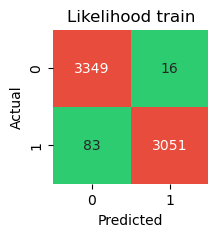

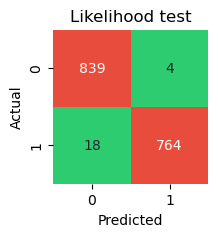

In [26]:
metrics_train.display_confusion_matrix(pred_likelihood_train,"Likelihood train")
metrics_test.display_confusion_matrix(pred_likelihood_test,"Likelihood test")

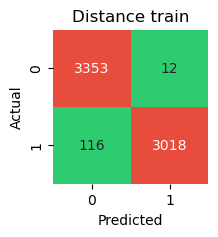

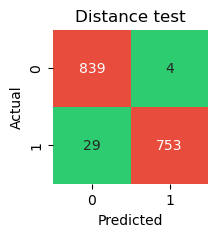

In [27]:
metrics_train.display_confusion_matrix(pred_dist_train,"Distance train")
metrics_test.display_confusion_matrix(pred_dist_test,"Distance test")

Misclassifying a poisonous mushroom as safe can have severe consequences, potentially leading to serious health issues or even death. In the context of mushroom classification, the cost of missing a poisonous mushroom is generally considered higher.

# Q3.2.12

Linear Discriminant Analysis (LDA):

    Class Priors (ϕ_k): Two parameters (one for each class).
    Class Means (μ_k): 40 parameters (20 for each class).
    Shared Covariance Matrix (Σ): 20 parameters (assuming a shared covariance matrix among classes).
    Total Parameters for LDA: 2 + 40 + 20 = 62 parameters

Quadratic Discriminant Analysis (QDA):

    Class Priors (ϕ_k): Two parameters (one for each class).
    Class Means (μ_k): 40 parameters (20 for each class).
    Class-Specific Covariance Matrices (Σ_k): 420 parameters (assuming a separate covariance matrix for each class).
    Total Parameters for QDA: 2 + 420 + 40 = 462 parameters

Logistic Regression:

    For logistic regression, the number of parameters is determined by the number of features. 
    Total Parameters for Logistic Regression: 20 (weights) + 1 (bias) = 21 parameters

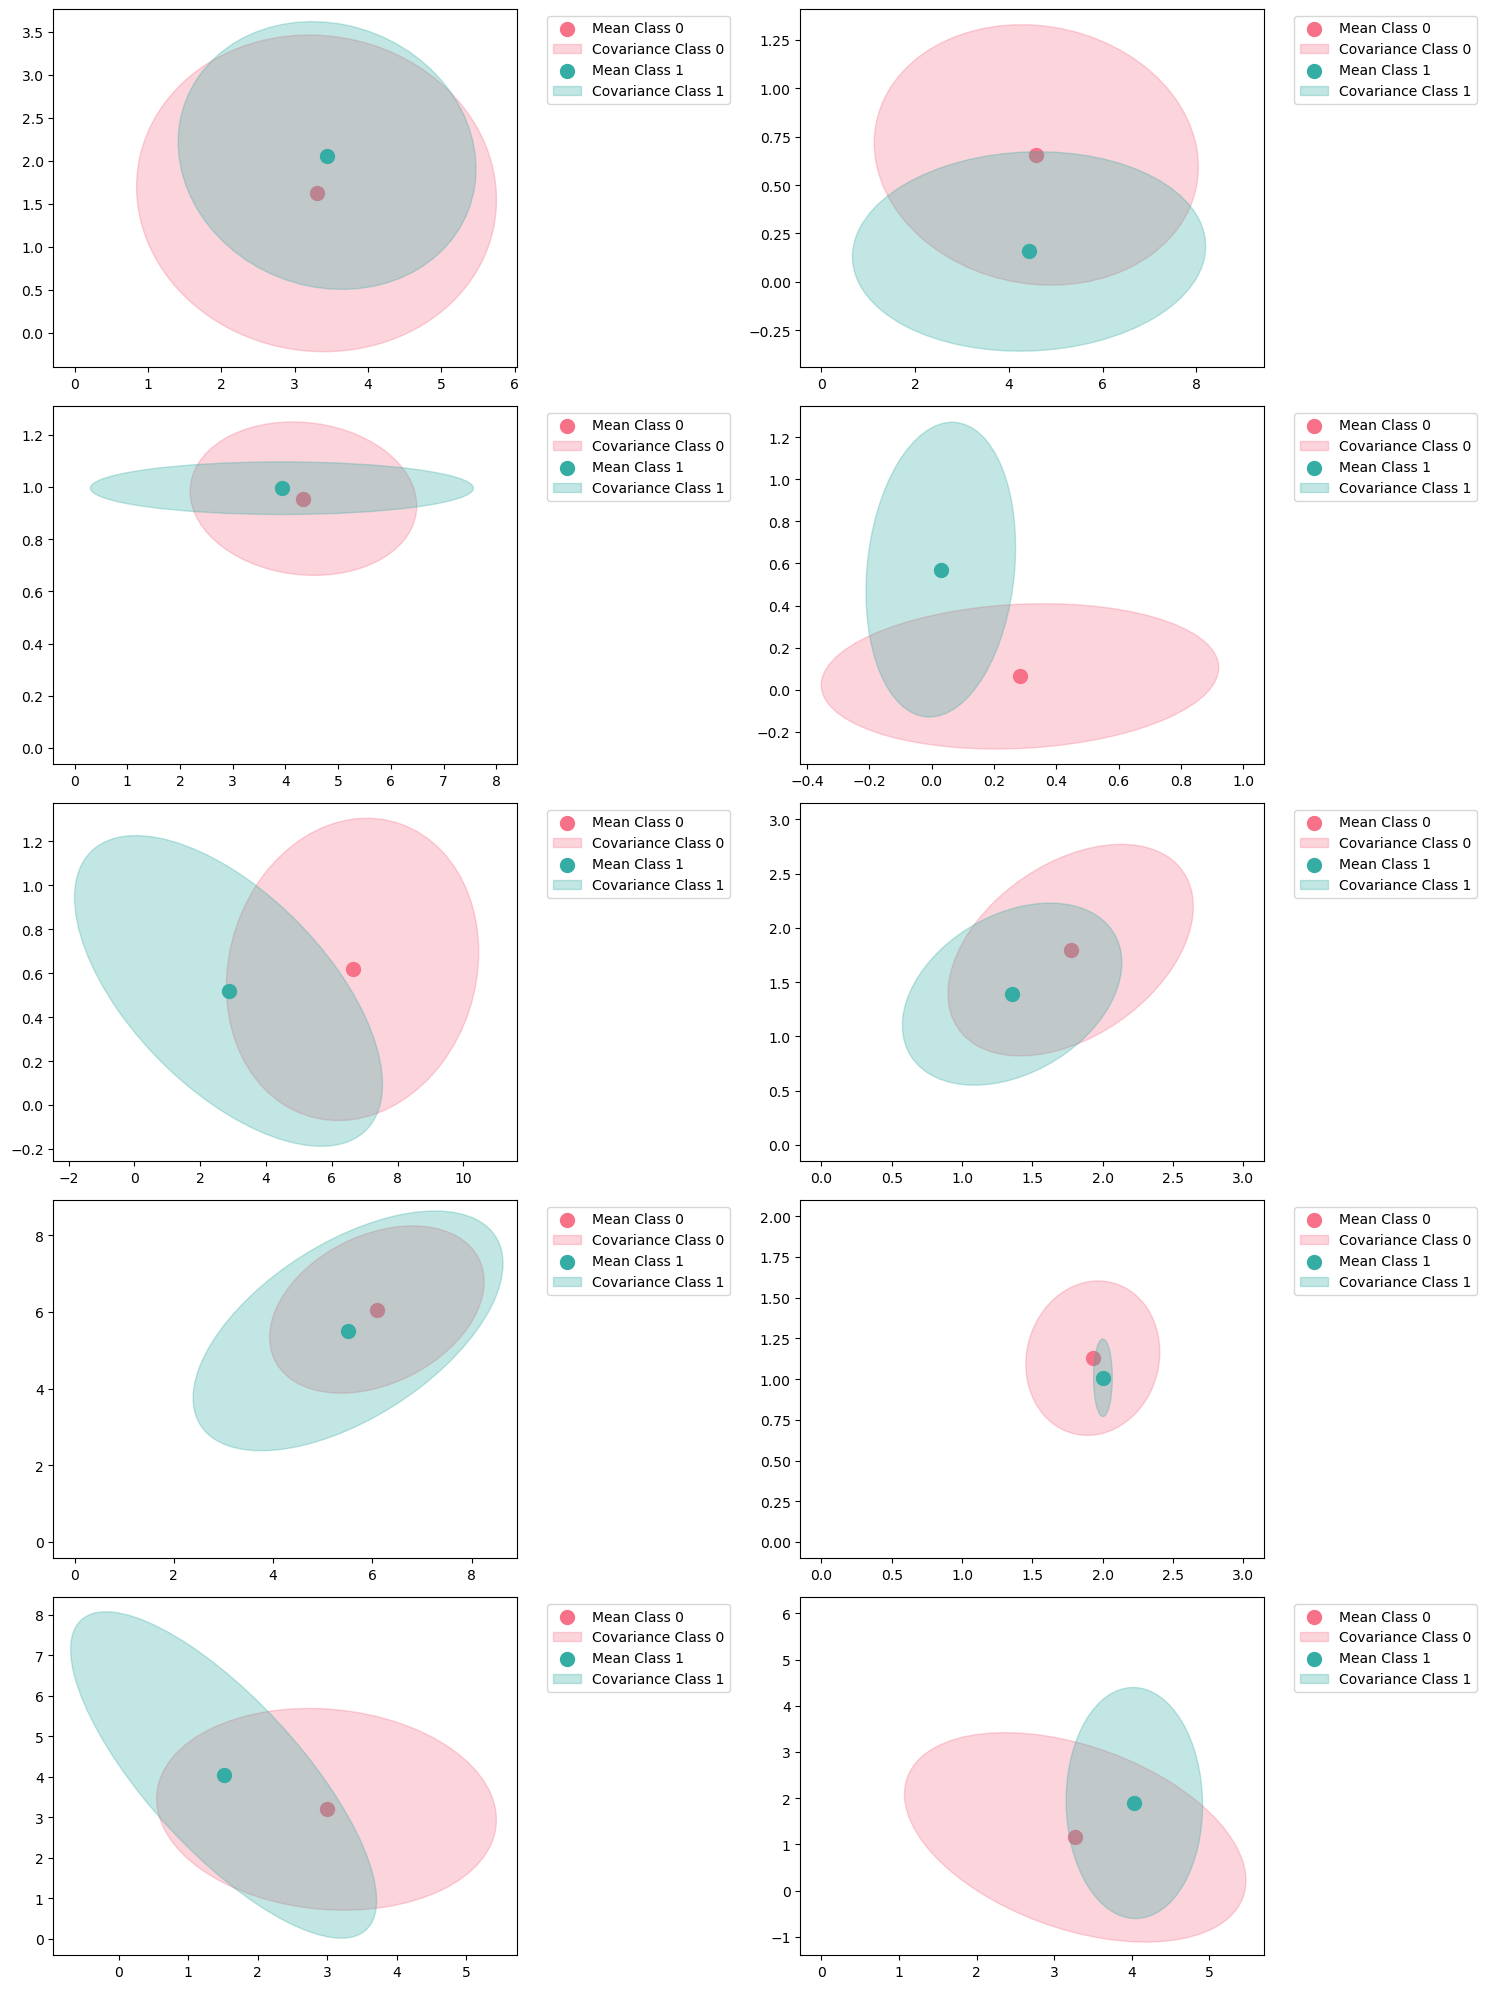

In [36]:
feature_combinations = [(0, 1), (2, 3), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (16, 17), (18, 19)]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()
colors = sns.color_palette("husl", n_colors=len(np.unique(y_train)))
for i, (feature1, feature2) in enumerate(feature_combinations):
    selected_features = X_train[:, [feature1, feature2]]
    sns.scatterplot(x=selected_features[:, 0], y=selected_features[:, 1], ax=axes[i],alpha=0)
    for class_label, color in zip(np.unique(y_train), colors):
        class_features = selected_features[y_train == class_label]
        mean_x = np.mean(class_features[:, 0])
        mean_y = np.mean(class_features[:, 1])
        axes[i].scatter(mean_x, mean_y, color=color, marker='o', s=100, label=f'Mean Class {class_label}')
        covariance_matrix = np.cov(class_features, rowvar=False)
        v, w = np.linalg.eigh(covariance_matrix)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan(u[1] / u[0])
        angle = 180.0 * angle / np.pi
        ell = plt.matplotlib.patches.Ellipse([mean_x, mean_y], v[0], v[1], angle=180.0 + angle, color=color, alpha=0.3, label=f'Covariance Class {class_label}')
        axes[i].add_patch(ell)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
